In [48]:
import numpy as np

In [49]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [50]:
import scipy.stats
from tqdm import tqdm

In [53]:
from tools import HelperTorch
from domain import Flower, Polygon, Heart, Cross, Star

In [5]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.random.seed(9)

## My Domains

In [6]:
def plot_domain(myDomain):
    points = myDomain.position(np.arange(0, 1, 0.001))
    
    fig = plt.figure(figsize=(3, 3))
    plt.plot(points[0, :], points[1, :])
    plt.legend(loc="upper left", prop={'size': 10})
    plt.tight_layout()
    plt.show()

No handles with labels found to put in legend.


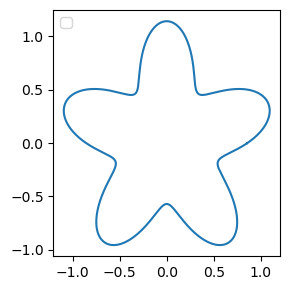

In [7]:
myFlower = Flower(petals=5, move_out=3)
plot_domain(myFlower)

No handles with labels found to put in legend.


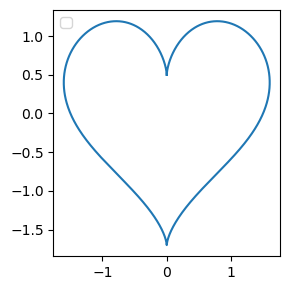

In [8]:
myHeart = Heart()
plot_domain(myHeart)

No handles with labels found to put in legend.


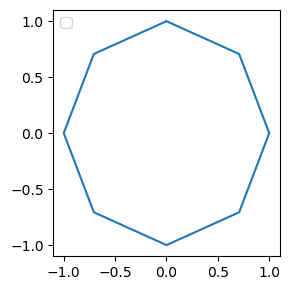

In [9]:
myPolygon = Polygon(corners=8)
plot_domain(myPolygon)

No handles with labels found to put in legend.


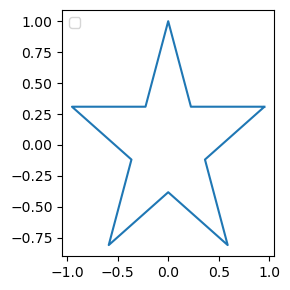

In [10]:
myStar = Star()
plot_domain(myStar)

No handles with labels found to put in legend.


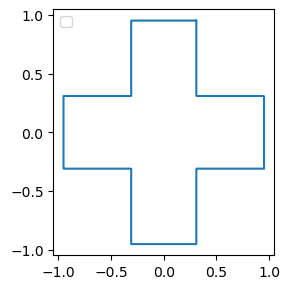

In [11]:
myCross = Cross()
plot_domain(myCross)

## My Unconstrained Data

In [21]:
def save_toy_path_paper(xt, num_snapshot=None):
    import seaborn
    from scipy import stats
    lims = [-0.1, 1.1]
    
    num_row = 1
    num_col = np.ceil(num_snapshot/num_row).astype(int)
    total_steps = xt.shape[1]
    sample_steps = np.linspace(0, total_steps-1, num_snapshot).astype(int)
    plt.style.use('default')
    fig, axes = plt.subplots(num_row, num_col, figsize=[num_col*2.5, num_row*2.5])
    plt.subplots_adjust(hspace=0.0, wspace=0.0)
    fig.patch.set_facecolor('lightgrey')
    axes = axes.reshape(-1)
    
    for ax, step in zip(axes, sample_steps):
        x, y = xt[:, step, 0], xt[:, step, 1]
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)(values)
        
        ax = fig.add_subplot(ax)
        cmap = 'viridis'
        seaborn.scatterplot(x=x, y=y, s=8, c=kernel, vmin=-0.002, cmap=cmap, alpha=0.5)
        
        ax.set_xlim(*lims)
        ax.set_ylim(*lims)
        ax.axis('off')
    plt.axis('off')
    

In [60]:
import torch
import numpy as np
Xt = torch.rand(1000, 100, 2).numpy() * 8


In [61]:
save_toy_path_paper(Xt, 5)

In [62]:
myFlower = Flower(radius=7)
myDomainCurve = myFlower.position(np.arange(0, 1, 0.001))
#myDomainCurve = get_domain(opt)(radius=opt.domain_radius).position(np.arange(0, 1, 0.001))

In [162]:
import seaborn
from scipy import stats
lims = [-0.1, 1.1]

xt = Xt
num_snapshot = 5
num_row = 1
num_col = np.ceil(num_snapshot/num_row).astype(int)


total_steps = xt.shape[1]
sample_steps = np.linspace(0, total_steps-1, num_snapshot).astype(int)
plt.style.use('default')
fig, axes = plt.subplots(num_row, num_col, figsize=[num_col*2.5, num_row*2.5])
plt.subplots_adjust(hspace=0.0, wspace=0.02)
#fig.patch.set_facecolor('lightgrey')
axes = axes.reshape(-1)

for ax, step in zip(axes, sample_steps):
    x, y = xt[:, step, 0], xt[:, step, 1]
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)(values)

    ax = fig.add_subplot(ax)
    cmap = 'salmon'
    #seaborn.scatterplot(x=x, y=y, s=8, c=kernel, vmin=-0.002, cmap=cmap, palette='red', alpha=0.5)
    seaborn.scatterplot(x=myDomainCurve[0, :], y=myDomainCurve[1, :], color='darkgreen', s=4, alpha=0.1)
    #ax.set_xlim(*lims)
    #ax.set_ylim(*lims)
    #ax.axis('off')
    
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)
    plt.setp(ax.spines.values(), color='lightgrey', alpha=0.4)
    #plt.axis('off')

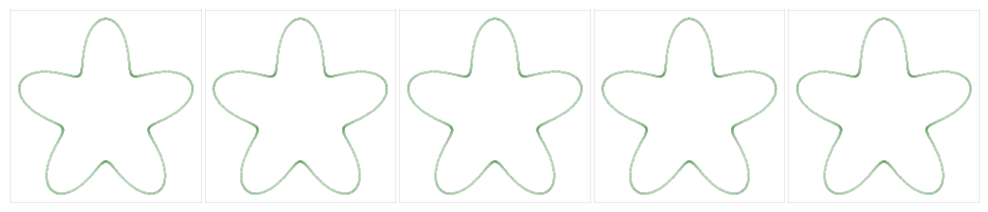

In [163]:
plt.show()

In [159]:
Yt = torch.rand(2, 2000).numpy()